## 1.0 Prerequisite Code

In [ ]:
#[include any prerequisite code needed to run your code here]
import seaborn as sns
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 1.1 Problem Definition & Statement (20)

In [ ]:
# @title Identify Problem/Dataset

Dataset = 'amazon_reviews.csv' # @param ["lotion-reviews.csv", "spam.csv", "airlines.csv", "weightloss.csv", "amazon_reviews.csv"]
Target_Variable = 'overall' # @param {type:"string"}

print(Dataset)
print(Target_Variable)


amazon_reviews.csv
overall


A lack of understanding of negative reviews and customer sentiment can have a disastrous impact on a brand’s reputation and sales, especially for an e-commerce giant like Amazon.

This dataset includes 5,743 product reviews, providing information such as overall ratings, review text, product brand, product price, and more. The primary problem is that negative reviews can damage customer trust and incur potential costs for Amazon in terms of replacements, refunds, and other expenses. Additionally, negative reviews affect customers whose expectations were not met and sellers who lose revenue and reputation.

We aim to develop a sentiment analysis model to classify reviews as either positive or negative. This is important because positive customer experiences can lead to higher sales and enhance Amazon's reputation among manufacturers and sellers of automotive products. Addressing negative reviews can help identify areas for product improvement, reducing return rates and saving costs.

From a social perspective, customers will benefit from more reliable reviews, helping them make better purchasing decisions and enhancing their overall shopping experience. This will also strengthen the relationship between customers and sellers, as manufacturers can use feedback to improve products, leading to greater customer loyalty.

We plan to implement several classification techniques, such as random forest, SVM, and ANN, to build the predictive model. Our goal is to achieve an accuracy of at least 80%, along with balanced precision, recall, F1 scores, and precision/recall ROC AUC to ensure the model performs well.

<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (15)


In [ ]:
# Loading the dataset
drive.mount('/content/drive')

reviews = pd.read_csv('/content/drive/MyDrive/INFO 585 - Group30/amazon_reviews.csv')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            5743 non-null   object 
 1   reviewerID      5743 non-null   object 
 2   reviewText      5743 non-null   object 
 3   overall         5743 non-null   int64  
 4   summary         5743 non-null   object 
 5   unixReviewTime  5743 non-null   int64  
 6   helpful_votes   5743 non-null   int64  
 7   total_votes     5743 non-null   int64  
 8   product_brand   4157 non-null   object 
 9   product_title   4964 non-null   object 
 10  product_price   5677 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 493.7+ KB


<Axes: >

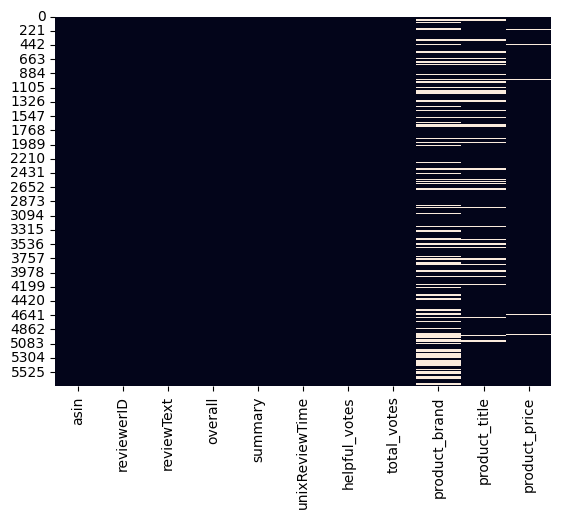

In [ ]:
# Checking for null values

reviews.info()
sns.heatmap(reviews.isnull(), cbar=False)

In [ ]:
# Dropping null values
reviews = reviews.dropna(subset=['product_brand', 'product_title', 'product_price'])

In [ ]:
# Dropping columns
reviews.drop(['asin', 'reviewerID', 'summary', 'unixReviewTime', 'product_title', 'helpful_votes', 'total_votes'], axis=1, inplace=True)



---



## 1.3 Data: Description & EDA (15)





In [ ]:
# Data preview and overview
reviews.head()

,reviewText,overall,product_brand,product_price
0,"I have an old car, Its bound to need these som...",5,Coleman Cable,55.99
1,Takes the dust off my car without leaving any ...,5,California Car Duster,23.95
2,This thing is great. I had another one from a ...,5,California Car Duster,23.95
3,"As we all know, dust gets over your rides in t...",5,California Car Duster,23.95
4,Maybe I don't understand the finer points of k...,3,California Car Duster,23.95


In [ ]:
# Data dimensionality
print(f"Number of Rows: {reviews.shape[0]}")
print(f"Number of Columns: {reviews.shape[1]}")

Number of Rows: 4157
Number of Columns: 4


In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(reviews[['overall', 'product_price']].describe())


Descriptive Statistics for Numerical Columns:
           overall  product_price
count  4157.000000    4157.000000
mean      4.519846      22.379021
std       0.899098      35.334391
min       1.000000       0.010000
25%       4.000000       7.990000
50%       5.000000      12.990000
75%       5.000000      23.280000
max       5.000000     975.000000


<Axes: >

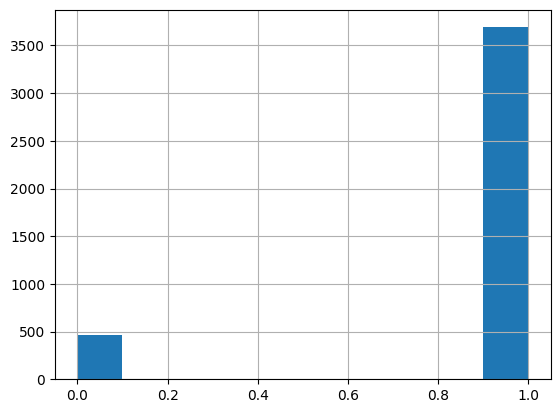

In [ ]:
# Cluster analysis for target variable
reviews['rating'] = reviews['overall'].replace({1:0, 2:0, 3:0, 4:1, 5:1}) #negative reviews as 0, which includes 1, 2, 3 and positive reviews as 1, which includes 4 and 5
reviews.rating.hist()


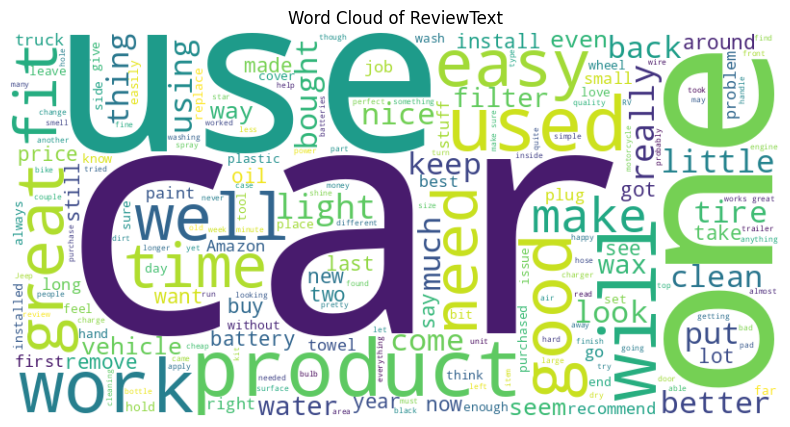

In [ ]:
# Wordcloud for review text
all_words = ' '.join(reviews['reviewText'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of ReviewText")
plt.show()

After preprocessing and cleaning the data, we have 4,157 rows and 4 columns. The mean of the overall rating is approximately 4.52, while the average product price is 22.37. The maximum product price is 975.0, and the minimum price is 0.01. The maximum overall rating is 5.0, while the minimum rating is 1.0. The Q1 value for overall rating is 4.0, and for product price, it is 7.99. Similarly, the Q3 value for overall rating is 5.0, and for product price, it is 23.28.

There are fewer than 500 values for overall ratings between 1 and 3, while there are more than 3,700 values for overall ratings between 4 and 5. This indicates a significant class imbalance, with positive overall ratings (4 and 5) vastly outnumbering negative overall ratings (1 to 3).

Some of the most prominent words in the word cloud include good, great, use, easy, and better, along with product-related terms such as car, water, and well. These suggest positive customer reviews and sentiments associated with their purchases.



---

<br>



## 2.0 Prerequisite Code

In [ ]:
#[include any prerequisite code needed to run your code here]
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install tensorflow==2.15.1
import tensorflow as tf
import spacy
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation, Input, TextVectorization, Embedding
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.initializers import Constant
from keras.models import load_model
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

## 2.1 Analysis (25)

In [ ]:
# Splitting the data
X = reviews['reviewText']
y = reviews['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
# Naive bayes
nb_sent = Pipeline([
                    ('vect', CountVectorizer(stop_words = 'english')),
                    ('tfidf', TfidfTransformer()),
                    ('nb', MultinomialNB()),
                    ])

nb_sent.fit(X_train, y_train)

pred = nb_sent.predict(X_test)
pred_prob = nb_sent.predict_proba(X_test)[:, 1]

In [ ]:
# Logistic regression
logistic_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),
    ('logistic', LogisticRegression())
])

logistic_pipe.fit(X_train, y_train)
log_pred = logistic_pipe.predict(X_test)
log_pred_prob = logistic_pipe.predict_proba(X_test)[:, 1]
precision_log, recall_log, _ = precision_recall_curve(y_test, log_pred)


In [ ]:
# LSTMs

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))

X_train_seq  = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq  = pad_sequences(X_train_seq, maxlen=100)
X_test_seq = pad_sequences(X_test_seq, maxlen=100)

size_of_vocabulary=len(tokenizer.word_index) + 1
print(size_of_vocabulary)

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      AUC(name='prc', curve='PR'), # precision-recall curve

]

clear_session()

model=Sequential()

model.add(Embedding(size_of_vocabulary,300,input_length=100,trainable=True))

model.add(LSTM(128,return_sequences=True,dropout=0.2))

model.add(GlobalMaxPooling1D())

model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=METRICS)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc=ModelCheckpoint('best_model', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=1)

#Print summary of model
print(model.summary())

9925
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          2977500   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          219648    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3205469 (12.23 MB)
Trainable params: 3205469 (12.23 MB)
Non-trainable params: 0 (0.00 Byte)
___________

In [ ]:
# Fitting the LSTM model to the data
history = model.fit(np.array(X_train_seq),np.array(y_train),batch_size=128,epochs=10,
                    validation_data=(np.array(X_test_seq),np.array(y_test)),verbose=1,callbacks=[es,mc])

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.4204 - tp: 2497.0000 - fp: 308.0000 - tn: 6.0000 - fn: 98.0000 - accuracy: 0.8604 - precision: 0.8902 - recall: 0.9622 - auc: 0.5145 - prc: 0.8954
Epoch 1: val_loss improved from inf to 0.36923, saving model to best_model
23/23 [==============================] - 31s 1s/step - loss: 0.4204 - tp: 2497.0000 - fp: 308.0000 - tn: 6.0000 - fn: 98.0000 - accuracy: 0.8604 - precision: 0.8902 - recall: 0.9622 - auc: 0.5145 - prc: 0.8954 - val_loss: 0.3692 - val_tp: 1096.0000 - val_fp: 152.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.8782 - val_precision: 0.8782 - val_recall: 1.0000 - val_auc: 0.5922 - val_prc: 0.9106
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.3413 - tp: 2595.0000 - fp: 314.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.8921 - precision: 0.8921 - recall: 1.0000 - auc: 0.5436 - prc: 0.9073
Epoch 2: val_loss did not improve from 0.36923
23/23 [================

## 2.2 Model Evaluation (15)

In [ ]:
# Naive Bayes Results
print(classification_report(y_test, pred))

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.88      1.00      0.94      1096

    accuracy                           0.88      1248
   macro avg       0.44      0.50      0.47      1248
weighted avg       0.77      0.88      0.82      1248

ROC AUC:  0.6403248655397619
Precision/Recall AUC:  0.0608974358974359


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Logistic regression results
print("\nLogistic Regression\n")
print(classification_report(y_test, log_pred))
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred_prob)
print('ROC AUC: ', auc(fpr_log, tpr_log))
print('Precision/Recall AUC: ', auc(recall_log, precision_log))


Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       152
           1       0.88      1.00      0.94      1096

    accuracy                           0.88      1248
   macro avg       0.94      0.50      0.47      1248
weighted avg       0.89      0.88      0.82      1248

ROC AUC:  0.7965448520937382
Precision/Recall AUC:  0.9394546912590216


In [ ]:
# LSTMs Results
model_results = model.evaluate(X_test_seq, y_test, batch_size=128, verbose=0)

for name, value in zip(model.metrics_names, model_results):
  print(name, ': ', value)

loss :  0.6460948586463928
tp :  1078.0
fp :  135.0
tn :  17.0
fn :  18.0
accuracy :  0.8774038553237915
precision :  0.8887056708335876
recall :  0.9835766553878784
auc :  0.6483174562454224
prc :  0.9127722978591919



Based on the output from the classification models, Logistic Regression emerges as the most suitable model for the business case focused on identifying negative reviews for Macy’s, given its strong performance on key metrics such as precision, recall, and ROC AUC. Logistic Regression achieves a high Precision/Recall AUC of 0.94, indicating that it is effective at handling class imbalances while maintaining a good balance between precision and recall. This is crucial since we need the model to not only identify as many negative reviews as possible but also avoid falsely classifying positive reviews as negative.

Naïve Bayes, while achieving an 88% accuracy, performs poorly for the minority class (negative reviews), with a zero recall for class 0 and low Precision/Recall AUC (0.06). This makes it an unsuitable choice for the business case, as missing negative reviews would directly harm the ability to address customer concerns. On the other hand, LSTMs show a decent Precision/Recall AUC of 0.91, indicating they provide a good balance between precision and recall, but their ROC AUC is lower than Logistic Regression’s (0.65).

Therefore, Logistic Regression is preferred because it strikes the best balance between accuracy, precision, recall, and ROC AUC, ensuring reliable classification of negative reviews while minimizing false positives and negatives.

## 2.3 Discussion & Conclusion (10)

Problem Statement and Data Summary:
The business problem revolves around the impact of negative reviews on Macy’s brand reputation and customer trust. Negative reviews can harm sales, increase costs related to returns or refunds, and damage the overall customer experience. The dataset consists of 5,743 product reviews, containing information such as overall ratings, review text, product brand, and price. The goal is to build a sentiment analysis model that classifies reviews as either positive or negative, with a focus on accurately identifying negative reviews to help mitigate their potential negative impact on the business.

Analysis and Findings:
Several classification models, including Logistic Regression, Naïve Bayes, and LSTMs, were evaluated. Logistic Regression outperformed the other models, achieving a high Precision/Recall AUC of 0.94, which is crucial for handling imbalanced classes and correctly identifying negative reviews. While Naïve Bayes had good accuracy, it failed to effectively identify negative reviews, as seen in its poor recall for class 0 (negative reviews). LSTMs showed a good balance between precision and recall but had lower ROC AUC and were computationally more expensive. Based on these findings, Logistic Regression is the preferred model due to its strong performance on the critical metrics of precision, recall, and ROC AUC, making it suitable for this application.

Business Recommendations:
To address the problem of negative reviews, it is recommended to deploy the Logistic Regression model for sentiment analysis of product reviews. This will allow Macy’s to quickly identify and address negative reviews, improving customer satisfaction and mitigating reputational damage. Proactively managing negative feedback can help reduce refund and return costs and enhance the overall shopping experience for customers. Additionally, the model can be used to generate actionable insights for product improvements by analyzing recurring themes in negative reviews.

Limitations & Constraints:

1. Imbalanced Data: While the models performed well, the dataset have an imbalance count between positive and negative reviews, which could impact the overall performance in real-world applications. Sampling techniques or more advanced models could be considered for better performance.
2. Ethical Concerns: There are ethical concerns related to privacy and bias in the data. The review data should be anonymized to protect customer identities, and care should be taken to ensure that the models do not unintentionally amplify biases or exclude important minority voices in reviews.